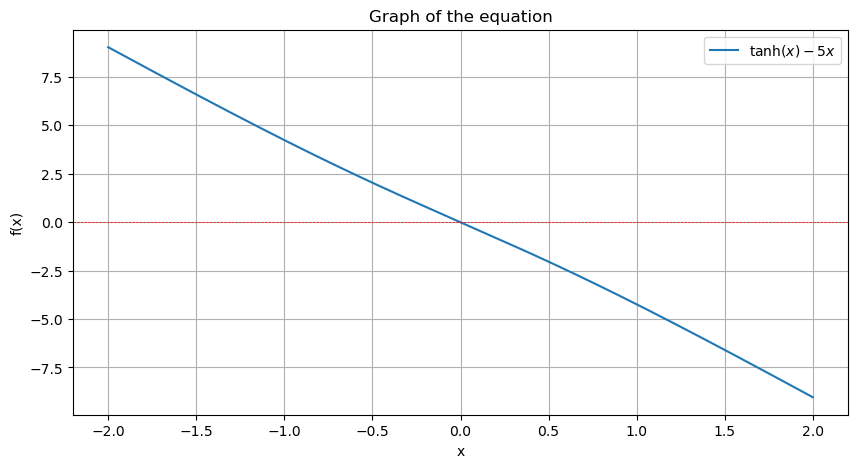

The root is: [0.]


In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# 定義方程式
def equation(x):
    return np.tanh(x) - 5 * x

# 生成一個x值的範圍來檢查方程式的行為
x_values = np.linspace(-2, 2, 400)
y_values = equation(x_values)

# 繪製方程式圖形
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, label=r'$\tanh(x) - 5x$')
plt.axhline(0, color='red', lw=0.5, ls='--')
plt.title('Graph of the equation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# 使用fsolve找出方程式的根，提供一個初始猜測值
root = fsolve(equation, 0.2)
print(f"The root is: {root}")


In [2]:
import numpy as np
from scipy.optimize import fsolve

# 定義方程組
def equations(vars):
    x, y = vars
    eq1 = x**2 - y**2 - 1
    eq2 = x**2/4 + y**2/4 - x*y/3 - 1
    return [eq1, eq2]

# 初始猜測值
initial_guess = [1, 1]

# 使用 fsolve 解方程
solutions = fsolve(equations, initial_guess)

print(f'解為: x = {solutions[0]}, y = {solutions[1]}')


解為: x = 2.5412526880497146, y = 2.3362288467392847


In [10]:
import numpy as np
from scipy.optimize import fsolve

# 定義方程組
def equations(vars):
    x, y, z = vars
    eq1 = np.exp(x**2) - y**2 - np.sin(z) - 1
    eq2 = 2*x + 2*y + z - 0.1
    eq3 = 144*(x**2 + y**2 + z**2) - 2*x*y + 2*x*z - 1
    return [eq1, eq2, eq3]

# 初始猜測值
initial_guess = [0.001, 0.001, 0.001]

# 使用 fsolve 解方程
solutions = fsolve(equations, initial_guess)

print(f'解為: x = {solutions[0]}, y = {solutions[1]}, z = {solutions[2]}')


解為: x = 0.07736599644789198, y = -0.029920123796477027, z = 0.0051082546971701025


In [12]:
import scipy.integrate as spi
import numpy as np

# 定義被積分的函數
f = lambda x: (1/(1+x**2)) * np.exp(-x)

# 計算從0到無窮大的積分
result, error = spi.quad(f, 0, np.inf)

print("積分結果:", result)
print("估計誤差:", error)#這個可以查看誤差有多少。


積分結果: 0.6214496242358136
估計誤差: 1.354704025249906e-09


In [3]:
import scipy.integrate as spi
import numpy as np

# 定義被積分的函數
f = lambda x, y: np.sin(x) * np.cos(y) / (1 + (x**2 + y**2)**2)

# 設定y的積分範圍
gfun = lambda x: 0
hfun = lambda x: 5

# 計算雙重積分
result, error = spi.dblquad(f, 0, 5, gfun, hfun)

print("積分結果:", result)
print("估計誤差:", error)


積分結果: 0.38907097785690764
估計誤差: 1.106464245853795e-08


In [17]:
import scipy.integrate as spi
import numpy as np
from math import sqrt

# 定義被積分的函數
f = lambda x, y: np.exp(-x**2 - y**2) / (1 + (x**2 + y**2)**2)

# 設定y的積分範圍
gfun = lambda x: 0
hfun = lambda x: sqrt(5**2 - x**2)

# 計算雙重積分
result, error = spi.dblquad(f, 0, 5, gfun, hfun)

print("積分結果:", result)
print("估計誤差:", error)

積分結果: 0.4880853935188313
估計誤差: 1.1444201902798338e-08


In [25]:
import numpy as np
from scipy.integrate import solve_ivp

# 定義微分方程
def diff_eq(t, y):
    v = y[1]
    dxdt = v
    # 確保不會發生除以零的錯誤
    epsilon = 1e-10
    dvdt = 1/np.cosh(t)**2 / np.sqrt(epsilon + (1 - min(v**2, 1)))
    return [dxdt, dvdt]

# 初始條件和時間範圍
initial_conditions = [1, 0]  # x(0)=1, v(0)=0
t_span = (0, 1)
t_eval = np.linspace(t_span[0], t_span[1], 10)

# 求解微分方程
sol = solve_ivp(diff_eq, t_span, initial_conditions, t_eval=t_eval)

# 檢查解是否有效
if sol.status == -1:
    print("求解過程中出現錯誤:", sol.message)
else:
    # 獲得數值解
    x_values = sol.y[0]
    v_values = sol.y[1]

    # 顯示數值解
    for t, x, v in zip(sol.t, x_values, v_values):
        print(f"t = {t:.2f}, x(t) = {x:.6f}, v(t) = {v:.6f}")


t = 0.00, x(t) = 1.000000, v(t) = 0.000000
t = 0.11, x(t) = 1.006167, v(t) = 0.110884
t = 0.22, x(t) = 1.024613, v(t) = 0.220575
t = 0.33, x(t) = 1.055082, v(t) = 0.327708
t = 0.44, x(t) = 1.097218, v(t) = 0.431193
t = 0.56, x(t) = 1.150651, v(t) = 0.530650
t = 0.67, x(t) = 1.214999, v(t) = 0.626399
t = 0.78, x(t) = 1.289865, v(t) = 0.719467
t = 0.89, x(t) = 1.374944, v(t) = 0.812154
t = 1.00, x(t) = 1.470607, v(t) = 0.913035


In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of first-order differential equations
def diff_eq(t, v):
    x, dxdt, y, dydt = v
    dv1dt = dxdt
    dv2dt = dydt * x
    dv3dt = dydt
    dv4dt = -dxdt * x
    return [dv1dt, dv2dt, dv3dt, dv4dt]

# Initial conditions
initial_conditions = [1, 0, 0, 1]

# Time range
t_span = (0, 1)
t_eval = np.linspace(t_span[0], t_span[1], 10)

# Solve the system of differential equations
sol = solve_ivp(diff_eq, t_span, initial_conditions, t_eval=t_eval)

# Extract the solutions
x_values = sol.y[0]
y_values = sol.y[2]

# Display the numerical solutions
for t, x, y in zip(sol.t, x_values, y_values):
    print(f"t = {t:.2f}, x(t) = {x:.6f}, y(t) = {y:.6f}")


t = 0.00, x(t) = 1.000000, y(t) = 0.000000
t = 0.11, x(t) = 1.006173, y(t) = 0.110882
t = 0.22, x(t) = 1.024624, y(t) = 0.220345
t = 0.33, x(t) = 1.055419, y(t) = 0.326985
t = 0.44, x(t) = 1.098596, y(t) = 0.429304
t = 0.56, x(t) = 1.153983, y(t) = 0.525625
t = 0.67, x(t) = 1.221195, y(t) = 0.614088
t = 0.78, x(t) = 1.299636, y(t) = 0.692648
t = 0.89, x(t) = 1.388500, y(t) = 0.759079
t = 1.00, x(t) = 1.486611, y(t) = 0.811009


fitting parameter: a=45.2080, b=-14.8623, c=172.7948


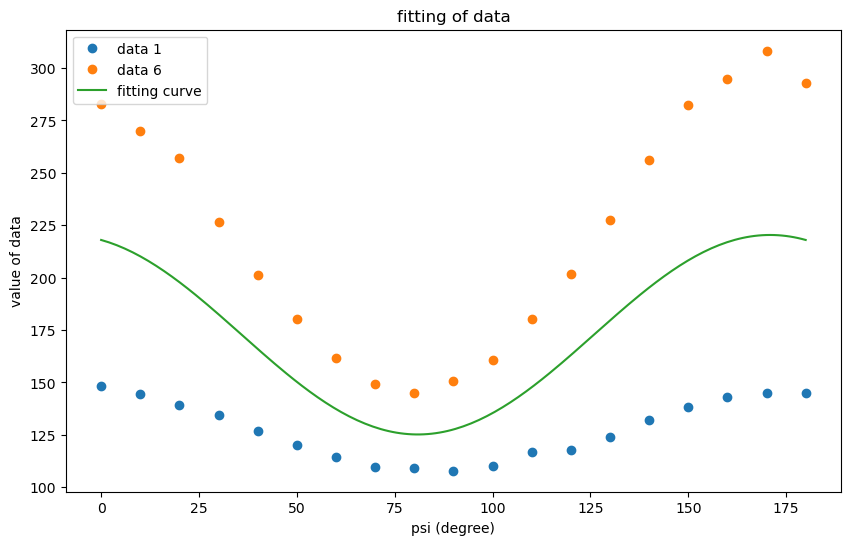

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 定義擬合函數
def fit_function(psi, a, b, c):
    return a * np.cos(2 * psi) + b * np.sin(2 * psi) + c

# 第一組數據
psi_1 = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180])
data_1 = np.array([148.217, 144.6452, 139.3463, 134.3294, 127.0331, 120.3477, 114.6494, 109.8204, 109.1389,
107.9053, 110.2316, 116.7877, 117.6572, 123.7668, 132.0735, 138.1479, 143.1178, 145.127, 145.0212])

# 第二組數據
psi_2 = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180])
data_2 = np.array([282.9576, 269.8454, 257.121, 226.6199, 201.4647, 180.3748, 161.6112, 149.2392, 144.9625,
150.5551, 160.8827, 180.363, 201.6174, 227.4423, 256.0988, 282.2409, 294.8714, 308.289, 292.6978])

# 合併數據
psi_all = np.concatenate((psi_1, psi_2))
data_all = np.concatenate((data_1, data_2))

# 對合併數據進行曲線擬合
popt, pcov = curve_fit(fit_function, np.radians(psi_all), data_all)
a, b, c = popt

# 打印擬合參數
print(f'fitting parameter: a={a:.4f}, b={b:.4f}, c={c:.4f}')

# 繪圖比較
psi_fit = np.linspace(0, 180, 180)
fit = fit_function(np.radians(psi_fit), a, b, c)

plt.figure(figsize=(10, 6))

# 原始數據和擬合曲線
plt.plot(psi_1, data_1, 'o', label='data 1')
plt.plot(psi_2, data_2, 'o', label='data 6')
plt.plot(psi_fit, fit, '-', label='fitting curve')
plt.xlabel('psi (degree)')
plt.ylabel('value of data')
plt.title('fitting of data')
plt.legend()
plt.show()